<h1>Credit card fraud detection<h1>

**Importing requirements and dataset**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.seterr(all="ignore")
import warnings
warnings.simplefilter(action='ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Data Exploration**

In [3]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [4]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
frauds = data[data.fraud==1]

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


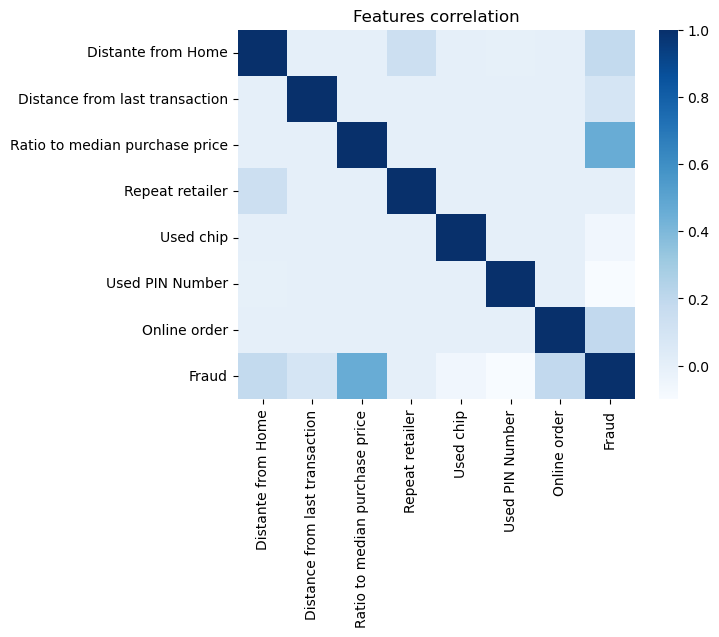

In [6]:
index = ['Distante from Home','Distance from last transaction','Ratio to median purchase price','Repeat retailer', 'Used chip','Used PIN Number','Online order', 'Fraud']
sns.heatmap(data.corr(), xticklabels=index, yticklabels=index,cmap='Blues')
plt.title("Features correlation")
plt.show()

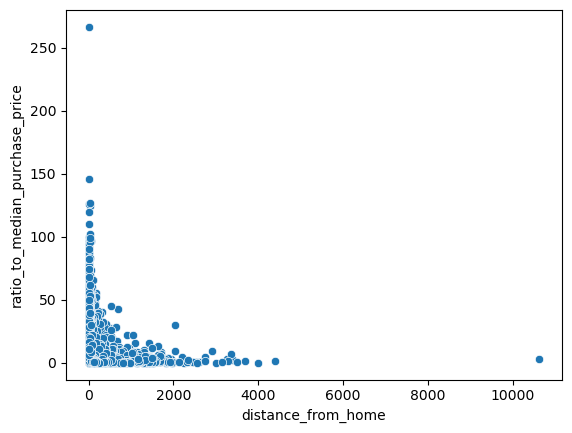

In [19]:
sns.scatterplot(data = frauds, x='distance_from_home',y='ratio_to_median_purchase_price')
plt.show()

<h3>Classification algorithms

<h4> Data creation and split<h4>

In [31]:
X = np.array(data.iloc[:,:-1])
Y = np.array(data.iloc[:,-1:])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [63]:
def confusion_matrix_display(Y_real, Y_predic):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(Y_real,Y_predic), annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
    plt.show()
    print(f'The F1 Score is {f1_score(Y_real,Y_predic)}')
    print(f'R2 score is: {r2_score(Y_real,Y_predic)}')


<h5> Logistic regression <h5>

In [57]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

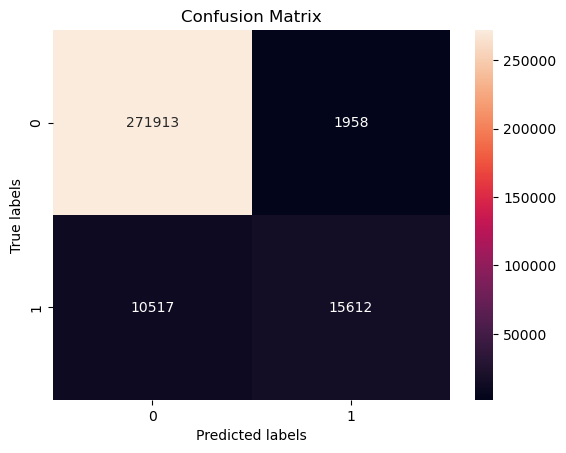

The F1 Score is 0.7145243598251677
R2 score is: 0.47701049650861405


In [66]:
confusion_matrix_display(Y_test,Y_pred)

In [59]:
parameters = {'penalty':['l2'],
              'C': [0.001,0.01,0.1,1,10,100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg','sag', 'saga']
             }

lr1 = LogisticRegression()
lr_grid = GridSearchCV(lr1,parameters)

lr_grid.fit(X_train,Y_train)

Y_pred_grid = lr_grid.predict(X_test)

In [60]:
lr_grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

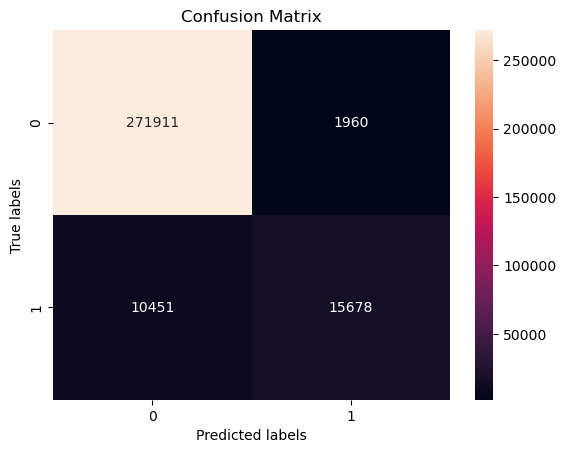

The F1 Score is 0.7164301871272877
R2 score is: 0.47969356891129533


In [67]:
confusion_matrix_display(Y_test,Y_pred_grid)

<h5> KNN<h5>

In [68]:
results = {'Neighbors':[],
           'R2': [],
           'F1': []
          }
neighbors = [1,3,5,7,9]
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    r2 = r2_score(Y_test,Y_pred_knn)
    f1 = f1_score(Y_test,Y_pred_knn)
    #Result append
    results['Neighbors'].append(neighbor)
    results['R2'].append(r2)
    results['F1'].append(f1)
    #print(f'Neighbors = {neighbor} done')
    
results_df = pd.DataFrame(results)

Neighbors = [1, 3, 5, 7, 9] done
Neighbors = [1, 3, 5, 7, 9] done
Neighbors = [1, 3, 5, 7, 9] done
Neighbors = [1, 3, 5, 7, 9] done
Neighbors = [1, 3, 5, 7, 9] done


In [70]:
results_df

,Neighbors,R2,F1
0,1,0.814407,0.917024
1,3,0.798937,0.910358
2,5,0.785061,0.904195
3,7,0.773574,0.898988
4,9,0.763261,0.894289


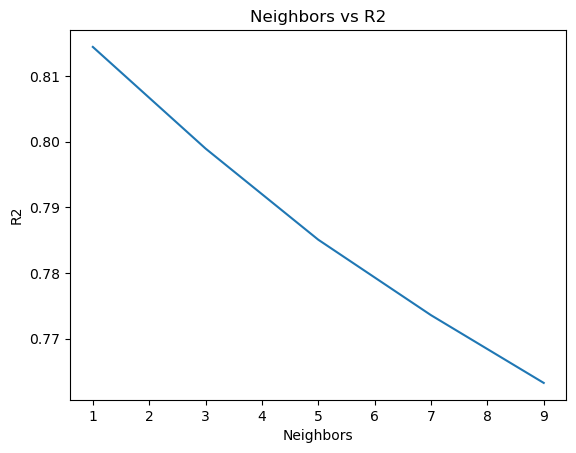

In [75]:
sns.lineplot(results_df,x='Neighbors', y='R2')
plt.title('Neighbors vs R2')
plt.show()

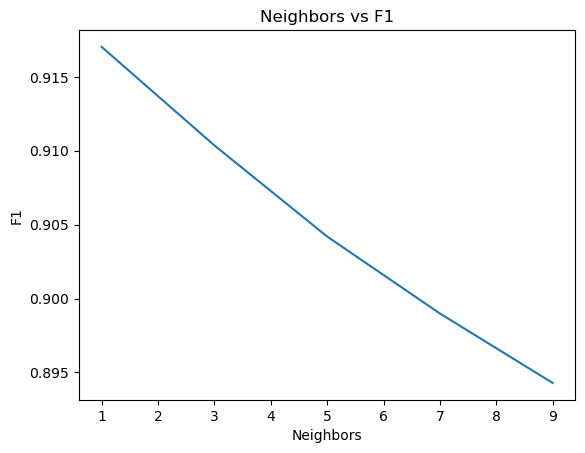

In [77]:
sns.lineplot(results_df,x='Neighbors', y='F1')
plt.title('Neighbors vs F1')
plt.show()

In [76]:
knn_def = KNeighborsClassifier(n_neighbors = 1)
knn_def.fit(X_train, Y_train)
Y_pred_knn_def = knn_def.predict(X_test)
r2 = r2_score(Y_test,Y_pred_knn_def)
f1 = f1_score(Y_test,Y_pred_knn_def)

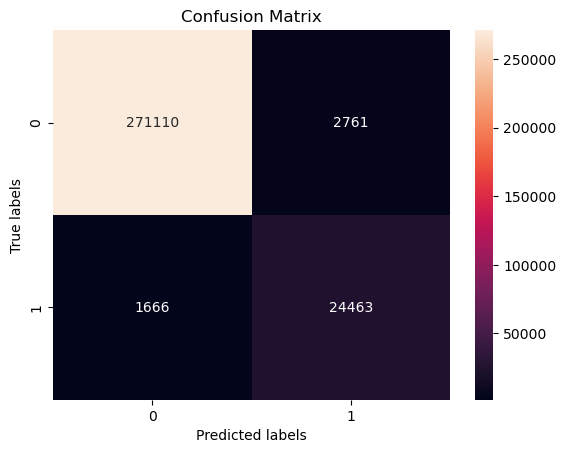

The F1 Score is 0.9170243472719435
R2 score is: 0.8144068511457823


In [78]:
confusion_matrix_display(Y_test,Y_pred_knn_def)

<h5> Random Forest<h5>

In [82]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)


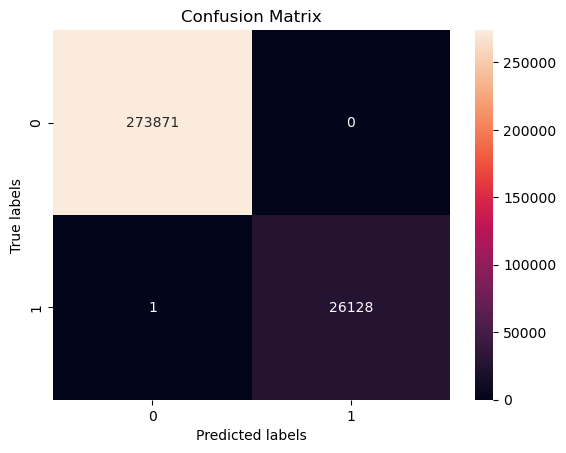

The F1 Score is 0.9999808638077196
R2 score is: 0.9999580769937081


In [83]:
confusion_matrix_display(Y_test,Y_pred_rf)